In [ ]:
# 필요한 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
#훈련 데이터
train = pd.read_csv('train.csv',index_col=0)
#테스트 데이터
test = pd.read_csv('test.csv')

(10000, 17)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, TRAIN_00000 to TRAIN_09999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  object 
 1   연간 소득              10000 non-null  float64
 2   현재 직장 근속 연수        10000 non-null  object 
 3   체납 세금 압류 횟수        10000 non-null  float64
 4   개설된 신용계좌 수         10000 non-null  int64  
 5   신용 거래 연수           10000 non-null  float64
 6   최대 신용한도            10000 non-null  float64
 7   신용 문제 발생 횟수        10000 non-null  int64  
 8   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 9   개인 파산 횟수           10000 non-null  int64  
 10  대출 목적              10000 non-null  object 
 11  대출 상환 기간           10000 non-null  object 
 12  현재 대출 잔액           10000 non-null  float64
 13  현재 미상환 신용액         10000 non-null  float64
 14  월 상환 부채액           10000 non-null  float64
 15  신용 점수              10000 non-null  int64  
 16  채무 불이행 여부  

In [ ]:
#결측치 없음
train.isnull().sum().sum()

np.int64(0)

In [5]:
#train 데이터에 대한 컬럼 확인
train.columns

Index(['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

### 그룹화하여 채무 상환비율을 비교했을때 채무상환 비율이 낮은 월세,자가와
### 채무 상환 비율이 높은 주택담보대출로 나누어 진행

In [15]:
train[['주거 형태']].value_counts()

주거 형태           
월세                  4050
주택 담보 대출 (거주 중)     3633
자가                  2241
주택 담보 대출 (비거주 중)      76
Name: count, dtype: int64

In [18]:
train[['주거 형태','채무 불이행 여부']].loc[train['채무 불이행 여부']==1].groupby('주거 형태').count()

,채무 불이행 여부
주거 형태,
월세,1559
자가,734
주택 담보 대출 (거주 중),1107
주택 담보 대출 (비거주 중),12


## 컬럼에 대한 고찰(변수 유형 정리해보기)
- UID는 index와 유사한 느낌
- 주거형태, 체납세금압류횟수,개설신용계좌,신용문제발생횟수,파산횟수,대출목적과 상환기간는 범주형 변수
- 연간소득,최대신용한도,현재대출잔액,미상환신용액,월 상환부채액,신용점수는 연속형
- 연체경과개월, 근속연수, 신용거래연수는 특정 기준에 따라서 연속형이 될수도 범주형 변수 처리도 가능할 것으로 보임

In [ ]:
#개설된 신용계좌   수 컬럼은 타 컬럼에 비해 값 종류가 다양해서 특정 기준에 따라 인코딩하여 진행
print(f"주거 형태 값 종류 : {train['주거 형태'].unique()}")
print(f"체납 세금 압류 횟수 값 종류 : {train['체납 세금 압류 횟수'].unique()}")
print(f"개설된 신용계좌 수 값 종류 : {train['개설된 신용계좌 수'].unique()}")
print(f"신용 문제 발생 횟수 값 종류 : {train['신용 문제 발생 횟수'].unique()}")
print(f"개인 파산 횟수 값 종류 : {train['개인 파산 횟수'].unique()}")
print(f"대출 목적 값 종류 : {train['대출 목적'].unique()}")
print(f"대출 상환 기간 값 종류 : {train['대출 상환 기간'].unique()}")

주거 형태 값 종류 : ['자가' '월세' '주택 담보 대출 (거주 중)' '주택 담보 대출 (비거주 중)']
체납 세금 압류 횟수 값 종류 : [0. 1. 2. 4. 6. 5. 3. 7.]
개설된 신용계좌 수 값 종류 : [ 9  5 12 15 11 17  8  6 10 14 13 16 22  7 19 21 23 18  4 27 24 28 20  3
 26 30 29 25  2 32 31 33 35]
신용 문제 발생 횟수 값 종류 : [0 1 2 6 5 4 3 7]
개인 파산 횟수 값 종류 : [1 0 3 2]
대출 목적 값 종류 : ['부채 통합' '자동차 구매' '기타' '사업 대출' '주택 개보수' '여행 자금' '소규모 사업 자금' '교육비' '의료비'
 '고액 구매' '결혼 자금' '휴가 비용' '주택 구매' '이사 비용']
대출 상환 기간 값 종류 : ['단기 상환' '장기 상환']


([<matplotlib.axis.XTick at 0x1d7e5af2670>,
 [Text(2.0, 0, '정상 상환'), Text(3.0, 0, '채무 불이행')])

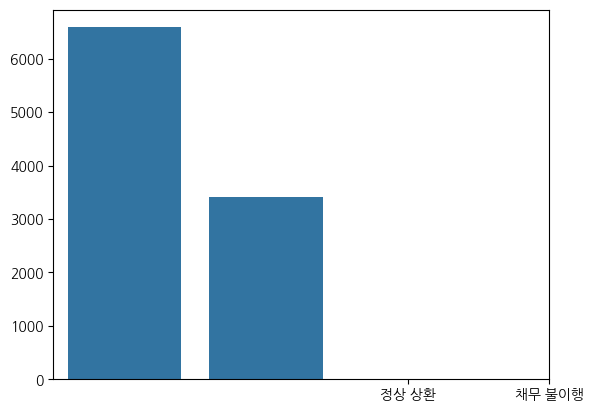

In [ ]:
#정상상환이 채무 불이행보다 2배 이상 데이터가 많이 있음 따라서 로지스틱 회귀 모델을 훈련할 때 오버샘플링을 통해 데이터 불균형 문제를 해결해야함
a = train['채무 불이행 여부'].value_counts()
sns.barplot(a.values)

In [29]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   주거 형태        10000 non-null  object 
 1   체납 세금 압류 횟수  10000 non-null  float64
 2   신용 문제 발생 횟수  10000 non-null  int64  
 3   개인 파산 횟수     10000 non-null  int64  
 4   대출 목적        10000 non-null  object 
 5   대출 상환 기간     10000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


<Axes: xlabel='주거 형태'>

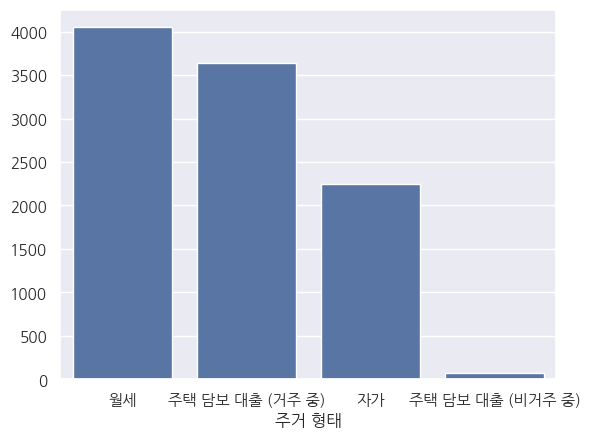

In [ ]:
# barplot을 통한 시각화 해보기
def bar(series):
    info_series = series.value_counts()
    return sns.barplot(x=info_series.index, y = info_series.values)
categorical_cols = ['주거 형태','체납 세금 압류 횟수', '신용 문제 발생 횟수', '개인 파산 횟수',
'대출 목적', '대출 상환 기간']
categorical_df = train.loc[:,categorical_cols]


In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(10, 20))
for i, col in enumerate(categorical_cols):
    sns.barplot(x=train[col].value_counts().index, y=train[col].value_counts().values, ax=ax[i])
    ax[i].set_title(col)
    plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

<Axes: ylabel='대출 목적'>

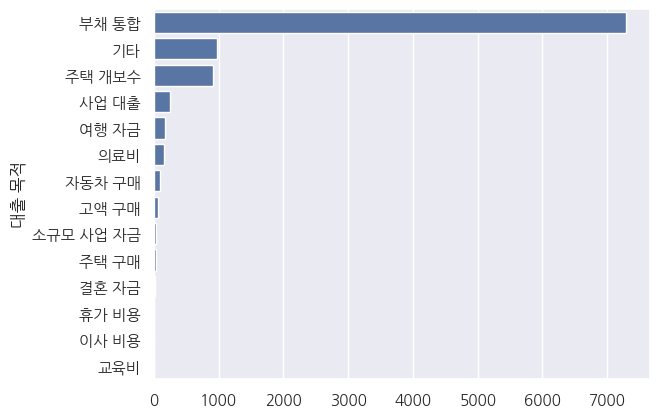

In [43]:
sns.barplot(x=train['대출 목적'].value_counts().values,y=train['대출 목적'].value_counts().index)

array([[<Axes: xlabel='연간 소득', ylabel='연간 소득'>,
        <Axes: xlabel='최대 신용한도', ylabel='연간 소득'>,
        <Axes: xlabel='현재 대출 잔액', ylabel='연간 소득'>,
        <Axes: xlabel='현재 미상환 신용액', ylabel='연간 소득'>,
        <Axes: xlabel='월 상환 부채액', ylabel='연간 소득'>,
        <Axes: xlabel='신용 점수', ylabel='연간 소득'>],
       [<Axes: xlabel='연간 소득', ylabel='최대 신용한도'>,
        <Axes: xlabel='최대 신용한도', ylabel='최대 신용한도'>,
        <Axes: xlabel='현재 대출 잔액', ylabel='최대 신용한도'>,
        <Axes: xlabel='현재 미상환 신용액', ylabel='최대 신용한도'>,
        <Axes: xlabel='월 상환 부채액', ylabel='최대 신용한도'>,
        <Axes: xlabel='신용 점수', ylabel='최대 신용한도'>],
       [<Axes: xlabel='연간 소득', ylabel='현재 대출 잔액'>,
        <Axes: xlabel='최대 신용한도', ylabel='현재 대출 잔액'>,
        <Axes: xlabel='현재 대출 잔액', ylabel='현재 대출 잔액'>,
        <Axes: xlabel='현재 미상환 신용액', ylabel='현재 대출 잔액'>,
        <Axes: xlabel='월 상환 부채액', ylabel='현재 대출 잔액'>,
        <Axes: xlabel='신용 점수', ylabel='현재 대출 잔액'>],
       [<Axes: xlabel='연간 소득', ylabel='현재 미상환 신용액'>,
        <Ax

c:\Users\fasdg\python\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
c:\Users\fasdg\python\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


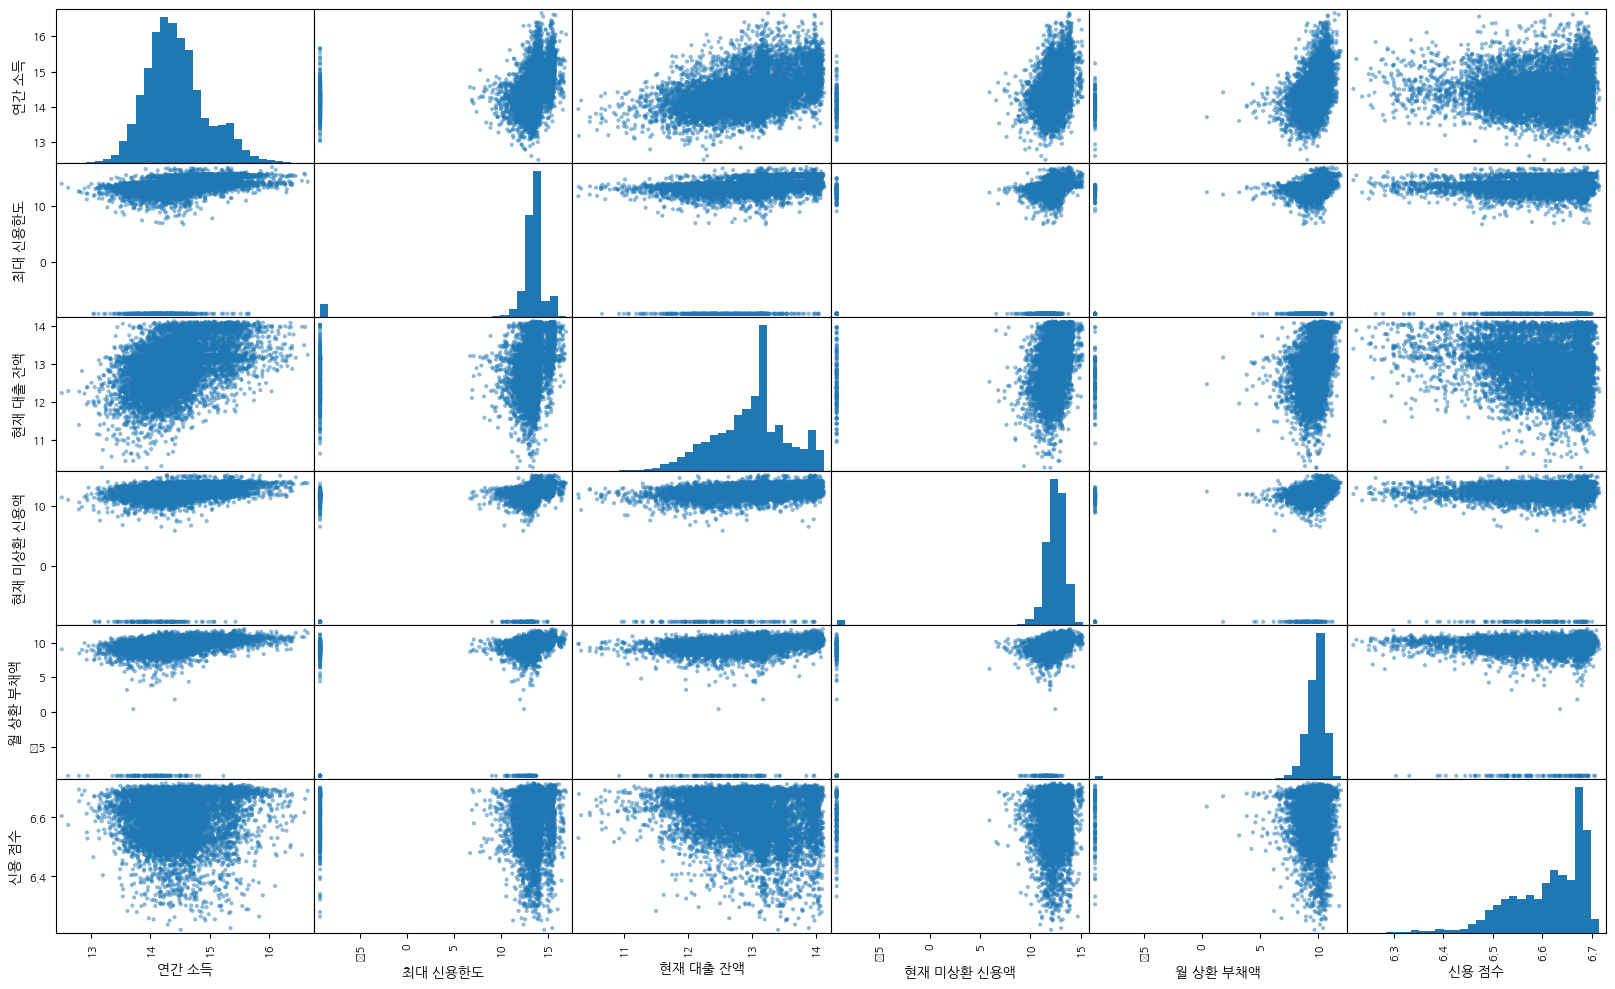

In [3]:
numeric_cols = ['연간 소득', '최대 신용한도', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수']
numeric_df = train.loc[:,numeric_cols]
log_df = numeric_df.apply(lambda x : np.log(x+1e-4))
pd.plotting.scatter_matrix(log_df,hist_kwds={'bins':30},figsize=(20,12))

<Axes: >

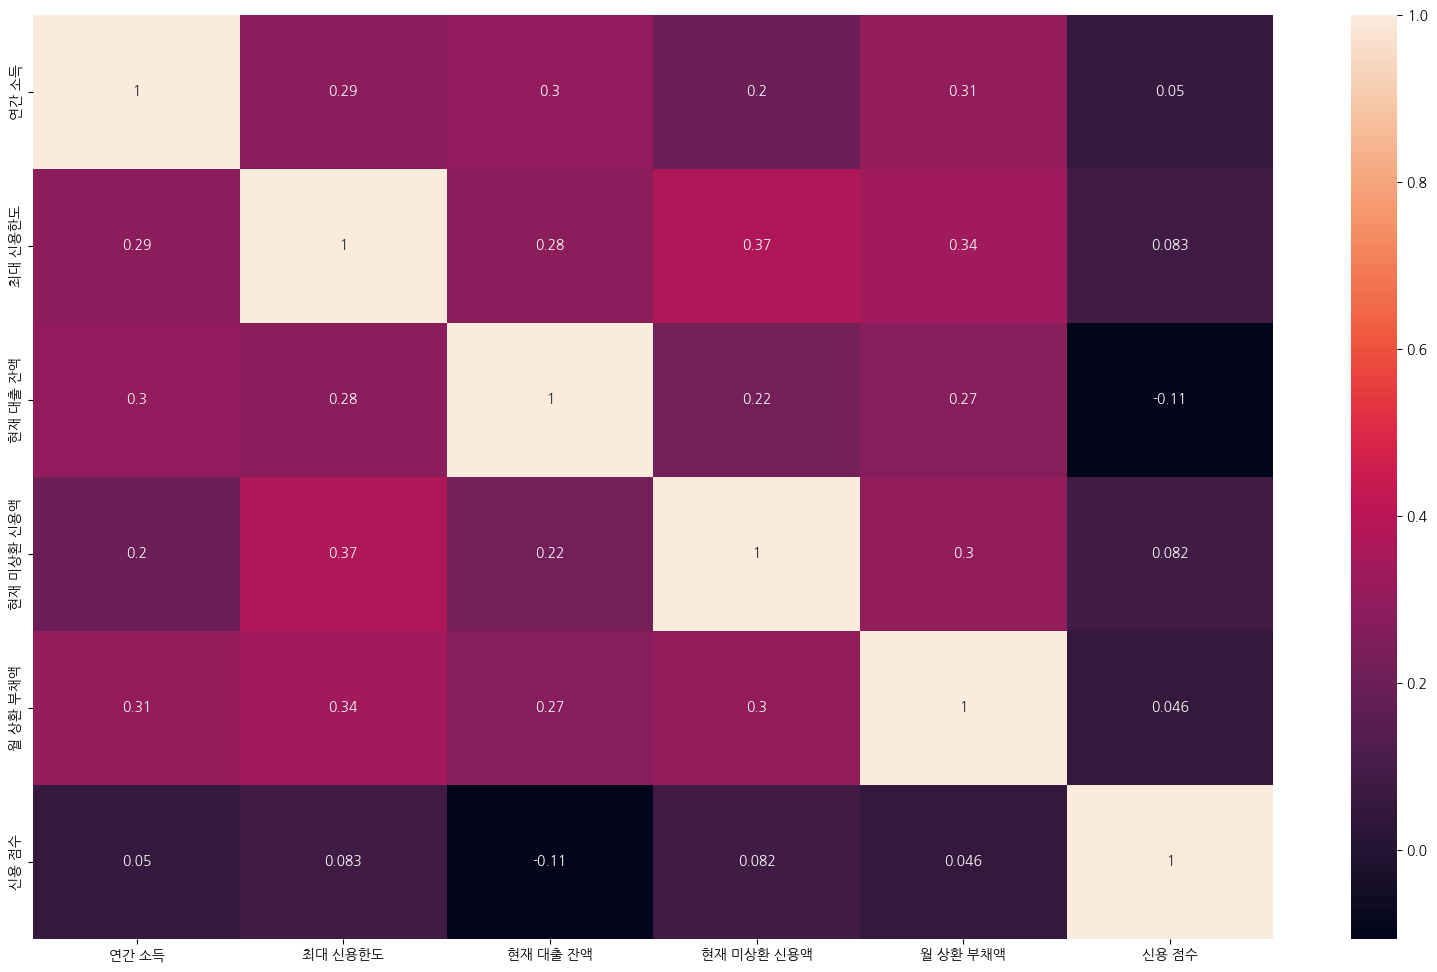

In [ ]:
#연속형 변수간 상관관계는 낮은 것으로 판단(정규성 만족하지 않아 켄달, 스피어만 상관계수로 관찰)
#선형적인 관계는 없지만 비선형적인 관계가 존재할 수 있음(머신러닝이 적합할지도)
plt.figure(figsize=(20,12))
sns.heatmap(numeric_df.corr(method='kendall'),annot=True)

In [7]:
train.columns

Index(['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

## 범주형 변수 더미변수로 만들기 및 변수 선택
- 주거형태 : 자가와 월세 : 0, 주담대 : 1
- 체납 세금 압류 횟수 : 0회 : 0, 1회 이상 : 1
- 신용 문제 발생 횟수 : 0회 : 0, 1회 이상 : 1
- 개인 파산 횟수 : 0회 : 0, 1회 이상 : 1
- 대출 목적 : 사생활 관련 비용 : 0, 부채 통합/사업자금/기타 : 1
- 상환 기간 : 단기 : 0, 장기 : 1